In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- test셋 확인하기
- 앙상블
- confusion 메트릭스
- F1 Score

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/train.csv', encoding='cp949')

In [0]:
test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
train_data

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


# Under Sampling

In [0]:
train_0=train_data[train_data['smishing']==0]
train_1=train_data[train_data['smishing']==1]

train_0=train_0.sample(n=18703)

In [0]:
# 데이터 합치기
train_mini=pd.concat([train_0,train_1])

# shuffling
train_mini=train_mini.sample(frac=1).reset_index(drop=True)

In [0]:
train_mini.head(10)

,id,year_month,text,smishing
0,209969,2017-11,XXX 고객님!밤새안녕하십니까?행복한주말을앞둔금요일입니다.찬바람에나뭇잎이뒹굴고단풍이...,0
1,303815,2018-09,(광고)안녕하세요어느덧 9월첫주네요따갑고 후덥지근한 휴가철도 지나고 여름의 끝자락에...,1
2,276563,2018-06,(광고)XXX은행 정확하고 올바른 신용대출 당사상품의 자격기준과 심사기준이 변동되어...,1
3,207572,2017-11,XXX 고객님안녕하세요?간밤에 내린 눈이 나무엔 조금쌓여 예쁜 그림이 된곳도 있습니...,0
4,260855,2018-05,XXX 고객님어린이날어버이날스승의날5월의 멋진 추억들을 만들어 보셨나요?세월이 흔들...,0
5,327912,2018-11,(광고)X (광고)XXX 항상 저희 XXX을 이용해주셔서 감사합니다. 2018년 ...,1
6,78440,2017-05,눈부신5월XXX입니다좋은일들만가득한행복한5월연휴보내세요 XXX상봉역XXX,0
7,289334,2018-08,(광고) 연금이체 혜택 안내XXX 고객님! 소중한 연금 받으실 때는 XXX 골든라...,0
8,272098,2018-06,XXX(광고)XXX XXX(XXX)평소 신용관리에 많은관심을 기울일 필요가 있으며신...,1
9,130448,2017-06,(광고)XXX 고객님광고)우아한 싱글을 위한 라이프를 위한 XXX 1코노미 스마트 ...,0


# word 추출

In [0]:
for i in [0,1]:
  f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_%d.txt'%i,'w')
  for line in train_mini[train_mini['smishing']==i]['text']:
    f.write('%s\n'%(line))
  f.close()

## class 0

In [0]:
f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_0.txt','r')
lines_0 = f.readlines()
lines_0 = [l.rstrip() for l in lines_0]
f.close()

In [0]:
text_0=' '.join(lines_0)
word_list_0 = text_0.split(' ')
sorted_word_list_0= sorted(word_list_0)
sorted_word_list_0[-1]
len(sorted_word_list_0)

437236

In [0]:
# 200개이상 단어 출력

num=1
kk_0={}
for idx,w in enumerate(sorted_word_list_0):
    if idx == len(sorted_word_list_0)-1:
        break
    if w == sorted_word_list_0[idx+1]:
        num +=1
    else:
        if num >= 200:
            kk_0[w]=num
        num=0

In [0]:
kk_0

{'': 19688,
 '(광고)': 236,
 '(광고)XXX': 356,
 '-': 857,
 '7월': 205,
 ':': 2044,
 'XXX': 12147,
 'XXX계장': 227,
 'XXX대리': 209,
 'XXX올림': 1202,
 'XXX은행': 3297,
 'XXX은행을': 550,
 'XXX지점': 465,
 'XXX지점을': 342,
 'XXX팀장': 271,
 '가능': 226,
 '가능한': 208,
 '가능합니다.': 282,
 '가득': 415,
 '가득하시길': 332,
 '가득한': 895,
 '가장': 229,
 '가정에': 287,
 '감사': 465,
 '감사드리며': 714,
 '감사드립니다.': 616,
 '감사의': 219,
 '감사합니다': 351,
 '감사합니다.': 669,
 '같은': 248,
 '거래': 708,
 '거래해': 785,
 '거래해주셔서': 586,
 '건강': 489,
 '건강과': 235,
 '경우': 1125,
 '고객님': 2383,
 '고객님!': 477,
 '고객님XXX은행': 326,
 '고객님께': 686,
 '고객님께서': 580,
 '고객님을': 405,
 '고객님의': 1570,
 '고객만족도': 533,
 '관련': 498,
 '관심을': 202,
 '궁금하신': 395,
 '그': 341,
 '기분': 307,
 '기분좋은': 296,
 '기원합니다.': 276,
 '꼭': 1048,
 '꾸준한': 253,
 '꾸준히': 224,
 '날': 202,
 '날씨에': 275,
 '내': 442,
 '내점': 341,
 '늘': 556,
 '다시': 233,
 '다양한': 594,
 '다운로드': 323,
 '다하겠습니다.': 205,
 '대단히': 238,
 '대출': 201,
 '대한': 604,
 '대해': 379,
 '더': 1023,
 '더욱': 563,
 '되세요': 281,
 '되시기': 210,
 '되시길': 741,
 '되어': 211,
 '드리는': 275

## Class 1

In [0]:
f = open('/content/drive/My Drive/Colab Notebooks/data/데이콘/smishing_Ver2_1.txt','r')
lines_1 = f.readlines()
lines_1 = [l.rstrip() for l in lines_1]
f.close()

text_1=' '.join(lines_1)
word_list_1 = text_1.split(' ')

sorted_word_list_1= sorted(word_list_1)
len(sorted_word_list_1)

2668135

In [0]:
# 1000개이상 나오는 단어 출력

num=1
kk_1={}
for idx,w in enumerate(sorted_word_list_1):
    if idx == len(sorted_word_list_1)-1:
        break
    if w == sorted_word_list_1[idx+1]:
        num +=1
    else:
        if num >= 1000:
            kk_1[w]=num
        num=0

In [0]:
kk_1

{'': 137408,
 '%': 1235,
 '(': 1225,
 '(광고)': 2708,
 '(광고)XXX': 3044,
 ')': 1258,
 '-': 7127,
 '.': 1196,
 '00분': 2524,
 '00시': 2338,
 '1.': 2429,
 '10%대의': 1374,
 '13건으로': 3330,
 '1금융권': 2123,
 '1년이상(1년미만도': 1733,
 '1등급까지': 1961,
 '1번': 3068,
 '1억': 1606,
 '2.': 2210,
 '2.97%자격:': 2582,
 '20%이상의': 1558,
 '2018년': 1294,
 '3%(등급': 1473,
 '3.': 2391,
 '3.97%자격:': 1290,
 '300%까지': 1010,
 '300%이내가능최근': 1041,
 '3000만원까지연': 1353,
 '3개월': 1010,
 '4.': 1747,
 '4000만': 1775,
 '4000만원': 1031,
 '45%85%': 2457,
 '5.': 1242,
 '50%이상': 1256,
 '5년분할상환': 1203,
 '6.': 1448,
 '6개': 2792,
 '6개월': 1549,
 '6개월간': 2818,
 '6개월이상': 1076,
 '7등급이내의': 4029,
 '8.68%12%자격:': 2208,
 '85%감소시켜드립니다.2.신용도를': 1565,
 '85%까지': 1656,
 '85%정도': 1053,
 ':': 3162,
 'I': 1078,
 'KISA': 1024,
 'XXX': 20836,
 'XXX-XXX-XXX': 2671,
 'XXX-XXX-XXX제목없음': 1104,
 'XXX에서': 1324,
 'XXX은행': 3775,
 'and': 1732,
 'bank': 1123,
 '가능': 6594,
 '가능하실수': 2523,
 '가능할': 1753,
 '가상': 1190,
 '가상조회를': 1580,
 '간단하게': 2626,
 '감사합니다': 1111,
 '감사합니다.2018

In [0]:
print(len(kk_0))
print(len(kk_1))

218
557


In [0]:
train_set=set()

for name in kk_0:
  train_set.add(name)

for name in kk_1:
  train_set.add(name)

print(len(train_set))
train_set=list(train_set)

721


# word 통일

In [0]:
train_mini.shape

(37406, 4)

In [0]:
train_vect = np.zeros((37406,len(train_set)))

In [0]:
text_0=' '.join(lines_0)
word_list_0 = text_0.split(' ')

In [0]:
start = time.time() 
for i in range(0,len(train_mini['text'])):
  test_list=train_mini['text'][i].split(' ')
  for text in test_list:
    try:
      train_vect[i][train_set.index(text)]=1
    except ValueError:
      pass
end = time.time() - start     
print(end/1000)
#train_mini['text'][0].split(' ')

0.029116134881973267


# Data Split

In [0]:
train_label=np.array(train_mini['smishing'])
train_label

array([0, 1, 1, ..., 0, 0, 0])

In [0]:
train_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train_vect,train_label, test_size=0.4, random_state=123)
#X_val, X_test,y_val,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=123)

In [0]:
print(X_train.shape)
print(y_train.shape)

(22443, 721)
(22443,)


# Modeling and Test

## sklearn LightLBGM

In [0]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=1000)

evals= [(X_test,y_test)]
model.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='auc',
             eval_set=evals,verbose=True)                             

[1]	valid_0's binary_logloss: 0.602817	valid_0's auc: 0.99423
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.528323	valid_0's auc: 0.995462
[3]	valid_0's binary_logloss: 0.466207	valid_0's auc: 0.996361
[4]	valid_0's binary_logloss: 0.414027	valid_0's auc: 0.996305
[5]	valid_0's binary_logloss: 0.369027	valid_0's auc: 0.996547
[6]	valid_0's binary_logloss: 0.330497	valid_0's auc: 0.996594
[7]	valid_0's binary_logloss: 0.296815	valid_0's auc: 0.996663
[8]	valid_0's binary_logloss: 0.267419	valid_0's auc: 0.996845
[9]	valid_0's binary_logloss: 0.241367	valid_0's auc: 0.997138
[10]	valid_0's binary_logloss: 0.218782	valid_0's auc: 0.997169
[11]	valid_0's binary_logloss: 0.198223	valid_0's auc: 0.99728
[12]	valid_0's binary_logloss: 0.180191	valid_0's auc: 0.997528
[13]	valid_0's binary_logloss: 0.163	valid_0's auc: 0.998069
[14]	valid_0's binary_logloss: 0.147877	valid_0's auc: 0.998512
[15]	valid_0's binary_logloss: 0.134532	valid_0's auc: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Submit

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
submit_vect=np.zeros((1626,len(train_set)))

In [0]:
start = time.time() 
for i in range(0,len(submit['text'])):
  text_list=submit['text'][i].split(' ')
  for text in text_list:
    try:
      submit_vect[i][train_set.index(text)]+=1
    except ValueError:
      pass
end = time.time() - start     
print(end/1000)

0.0009963948726654053


In [0]:
Y_predict = model.predict(submit_vect)

In [0]:
submit['smishing']=Y_predict

In [0]:
submit['smishing'].value_counts()

0    1488
1     138
Name: smishing, dtype: int64

In [0]:
submit.drop(['year_month','text'], axis='columns', inplace=True)

In [0]:
submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/gyu_submit_undersampling_LGBM.csv", mode='w')

## keras 로지스틱 회귀

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))




Train on 22443 samples, validate on 14963 samples
Epoch 1/100





22443/22443 [==============================] - 3s 123us/step - loss: 0.0476 - acc: 0.9873 - f1_m: 0.9888 - precision_m: 0.9859 - recall_m: 0.9950 - val_loss: 0.0100 - val_acc: 0.9973 - val_f1_m: 0.9973 - val_precision_m: 0.9989 - val_recall_m: 0.9959
Epoch 2/100
22443/22443 [==============================] - 2s 83us/step - loss: 0.0066 - acc: 0.9985 - f1_m: 0.9985 - precision_m: 0.9993 - recall_m: 0.9978 - val_loss: 0.0092 - val_acc: 0.9979 - val_f1_m: 0.9978 - val_precision_m: 0.9989 - val_recall_m: 0.9969
Epoch 3/100
22443/22443 [==============================] - 2s 85us/step - loss: 0.0037 - acc: 0.9993 - f1_m: 0.9993 - precision_m: 0.9999 - recall_m: 0.9987 - val_loss: 0.0095 - val_acc: 0.9983 - val_f1_m: 0.9982 - val_precision_m: 0.9990 - val_recall_m: 0.9975
Epoch 4/100
22443/22443 [==============================] - 2s 86us/step - loss: 0.0041 - acc: 0.9991 - f1_m: 0.9991 - precision_m: 0.9996 - recall_m: 0.998

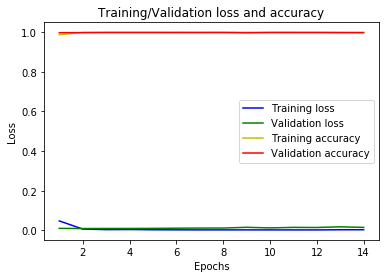

In [0]:
#3. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=len(train_set), activation ='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])



#5. 모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_acc',
    patience=10,
    ),
     ModelCheckpoint(
     filepath='multi_model.h5',
     monitor='val_loss',
     save_best_only=True,
     )
]

hist = model.fit(X_train, y_train, epochs = 100,callbacks=callbacks_list,validation_data=(X_test, y_test))

#6. 모델 평가하기
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Submit

In [0]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/public_test.csv', encoding='cp949')

In [0]:
submit_vect=np.zeros((1626,len(train_set)))

In [0]:
start = time.time() 
for i in range(0,len(submit['text'])):
  text_list=submit['text'][i].split(' ')
  for text in text_list:
    try:
      submit_vect[i][train_set.index(text)]+=1
    except ValueError:
      pass
end = time.time() - start     
print(end/1000)

0.0009990725517272949


In [0]:
Y_predict = model.predict(submit_vect)

In [0]:
submit['smishing']=Y_predict

In [0]:
submit.loc[submit['smishing']>=0.5,'smishing']=1
submit.loc[submit['smishing']<0.5,'smishing']=0

In [0]:
submit['smishing'].value_counts()

0.0    1358
1.0     268
Name: smishing, dtype: int64

In [0]:
#submit.drop(['year_month','text'], axis='columns', inplace=True)

In [0]:
#submit.to_csv("/content/drive/My Drive/Colab Notebooks/data/데이콘/gyu_submit_keras2.csv", mode='w')